In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Parámetros
alpha = 0.01  # Difusividad térmica

# Red neuronal
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = nn.Linear(2, 20)
        self.dense2 = nn.Linear(20, 20)
        self.out = nn.Linear(20, 1)
        self.activation = torch.tanh
    
    def forward(self, x, t):
        inputs = torch.cat([x, t], dim=1)
        x = self.activation(self.dense1(inputs))
        x = self.activation(self.dense2(x))
        return self.out(x)

# Función de pérdida basada en la ecuación del calor
def loss_fn(model, x, t):
    x.requires_grad = True
    t.requires_grad = True
    
    u = model(x, t)
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0]
    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    
    physics_loss = torch.mean((u_t - alpha * u_xx) ** 2)  # EDP
    return physics_loss

# Datos de entrenamiento
x_train = torch.rand(100, 1, requires_grad=True)
t_train = torch.rand(100, 1, requires_grad=True)

# Modelo y optimización
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [3]:
# Entrenamiento
for step in range(1000):
    optimizer.zero_grad()
    loss = loss_fn(model, x_train, t_train)
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

print("Entrenamiento finalizado!")

Step 0, Loss: 0.01118332426995039
Step 100, Loss: 2.0639054127968848e-05
Step 200, Loss: 9.069664884009399e-06
Step 300, Loss: 3.876084065268515e-06
Step 400, Loss: 1.7269829868382658e-06
Step 500, Loss: 9.333452339888026e-07
Step 600, Loss: 6.098125027165224e-07
Step 700, Loss: 4.366955863588373e-07
Step 800, Loss: 3.242444677198364e-07
Step 900, Loss: 2.4778597662589164e-07
Entrenamiento finalizado!


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x_test = torch.rand(100, 1, requires_grad=True)
t_test = torch.rand(100, 1, requires_grad=True)
y_predict = model.forward(x_test, t_test)

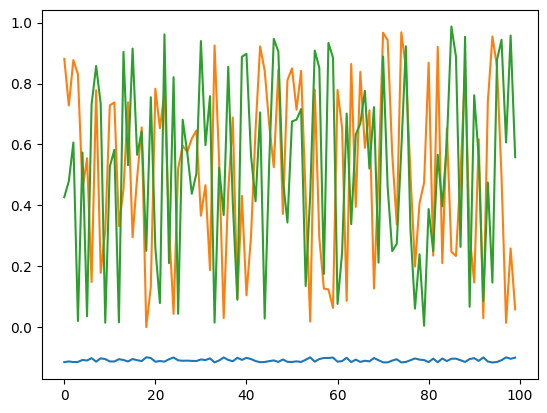

In [6]:
plt.plot(y_predict.detach().numpy()[:, 0])

plt.plot(x_test.detach().numpy()[:, 0])
plt.plot(t_test.detach().numpy()[:, 0])

plt.show()

In [7]:
# Parámetro de difusividad térmica
alpha = 0.01  

# Red neuronal
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = nn.Linear(2, 20)
        self.dense2 = nn.Linear(20, 20)
        self.out = nn.Linear(20, 1)
        self.activation = torch.tanh

    def forward(self, x, t):
        inputs = torch.cat([x, t], dim=1)
        x = self.activation(self.dense1(inputs))
        x = self.activation(self.dense2(x))
        return self.out(x)

# 🔹 Función de pérdida basada en la distancia de Bhattacharyya
def bhattacharyya_loss(model, x, t, target_distribution):
    x.requires_grad = True
    t.requires_grad = True

    # Predicción de la PINN
    u_pred = model(x, t)

    # Normalización de distribuciones (para que sumen 1)
    p = target_distribution / torch.sum(target_distribution)
    q = torch.abs(u_pred) / torch.sum(torch.abs(u_pred))  # Convertimos valores absolutos para evitar negativos

    # Cálculo de la distancia de Bhattacharyya
    bc_coeff = torch.sum(torch.sqrt(p * q))  # Coeficiente de Bhattacharyya
    loss = -torch.log(bc_coeff + 1e-8)  # Evitamos log(0) añadiendo un pequeño valor

    return loss

# 🔹 Generar datos de entrenamiento
x_train = torch.rand(100, 1, requires_grad=True)
t_train = torch.rand(100, 1, requires_grad=True)

# 🔹 Distribución objetivo (ejemplo: normal)
target_distribution = torch.exp(-((x_train - 0.5) ** 2) / 0.02)  # Gaussiana centrada en 0.5

# 🔹 Inicializar modelo y optimizador
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 🔹 Entrenamiento con pérdida de Bhattacharyya
for step in range(1000):
    optimizer.zero_grad()
    loss = bhattacharyya_loss(model, x_train, t_train, target_distribution)
    loss.backward(retain_graph=True)
    optimizer.step()
    
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

print("Entrenamiento finalizado!")

Step 0, Loss: 0.3238981068134308
Step 100, Loss: 0.12385139614343643
Step 200, Loss: 0.12088754028081894
Step 300, Loss: 0.11821361631155014
Step 400, Loss: 0.11861378699541092
Step 500, Loss: 0.1188950166106224
Step 600, Loss: 0.11653443425893784
Step 700, Loss: 0.11539456248283386
Step 800, Loss: 0.11395467072725296
Step 900, Loss: 0.11316615343093872
Entrenamiento finalizado!


In [8]:
x_test = torch.rand(100, 1, requires_grad=True)
t_test = torch.rand(100, 1, requires_grad=True)
y_predict = model.forward(x_test, t_test)

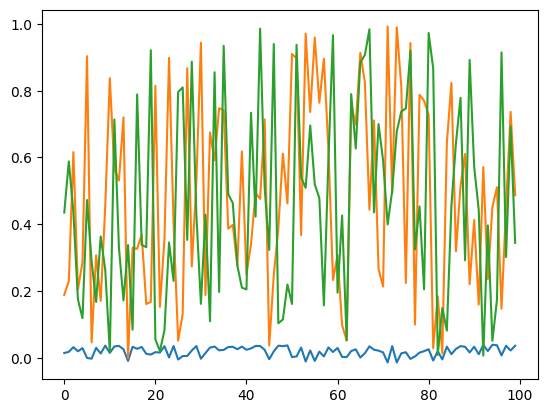

In [9]:
plt.plot(y_predict.detach().numpy()[:, 0])

plt.plot(x_test.detach().numpy()[:, 0])
plt.plot(t_test.detach().numpy()[:, 0])

plt.show()